# Google Playstore Data

## Exploratry Data Analysis 

# About Data


*`Instructions for citation:`*
If you use this dataset anywhere in your work, kindly cite as the below:
L. Gupta, "Google Play Store Apps," Feb 2019. [Online]. Available: https://www.kaggle.com/lava18/google-play-store-apps

*`Context`*
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

*`Content`*
Each app (row) has values for catergory, rating, size, and more.

*`Acknowledgements`*
This information is scraped from the Google Play Store. This app information would not be available without it.

*`Inspiration`*
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing libraries


In [841]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 2. Data loading and Exploring|Cleaning

- Let's Load the Csv

In [842]:
df = pd.read_csv("./data_sets/googleplaystore.csv")

- Let's have a look on top rows of the data

In [843]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [844]:
# Set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [845]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- Let's have a look on the shape of the dataset

In [846]:
df.shape

(10841, 13)

In [847]:
print(f"Number of rows: {df.shape[0]} and Number of columns: {df.shape[1]}")

Number of rows: 10841 and Number of columns: 13


- Not enough, let's have a look on the columns and their data types using detailed info function



In [848]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Observation
- There are 10841 rows and 13 columns in the dataset
- The columns are of different data types
- The columns in the datasets are:
'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',   'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',   'Android Ver'
- There are some missing values in the dataset which we will read in details and deal later on in the notebook.
- There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
'Size', 'Installs', 'Price'

In [849]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observation
We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that 'Size', 'Installs', 'Price' are also numeric, we must convert them to numeric data type in data wrangling process.

# How to make size a numeric column

In [850]:
df['Size'].isnull().sum()

np.int64(0)

- no Null values in the columns

In [851]:
df["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M                   

In [852]:
# check unique values in Size column
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Observation: 
There are several uniques values in the Size column, we have to first make the unit into one common unit from M and K to bytes, and then remove the M and K from the values and convert them into numeric data type

1. Varies of device
2. M
3. k

verify the number of values and 3 different kinds of values

In [853]:
# find the values having M in them
df['Size'].loc[df["Size"].str.contains('M')].value_counts().sum()

np.int64(8830)

In [854]:
# find the values having k in them
df['Size'].loc[df["Size"].str.contains('k')].value_counts().sum()

np.int64(316)

In [855]:
# find the values having 'VARIES WITH DEVICE' in them
df['Size'].loc[df["Size"].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [856]:
# Total Values in Size column
df['Size'].value_counts().sum()

np.int64(10841)

In [857]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830+316+1695

10841

1. We have 8830 values in M units
2. We have 316 values in k units
3. We have 1695 value in Varies with device.\
Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type.

In [858]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
 # lets define function
def convert_size(size):
    if isinstance(size, str):
        if "k" in size:
            return float(size.replace("k", ""))* 1024
        elif 'M' in size:
            return float(size.replace("M", ""))* 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return(size)                

In [859]:
# Lets apply this function to size column
df['Size'] = df['Size'].apply(convert_size)


In [860]:
# rename the column 'Size' to 'Size_bytes'
df.rename(columns={'Size': 'Size_bytes'}, inplace=True)

In [861]:
df['Size_Into_Mb'] = df["Size_bytes"].apply(lambda x : x / (1024*1024))

- Now we have converted every value into bytes and removed the M and K from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.


#### Let's have a look on the Installs column


In [862]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [863]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

# Install Column
- We have total value in Intall is 10841
- we have to remove +
and along with comma (,) and contervet into interger

In [864]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [865]:
df["Installs"].value_counts().sum()

np.int64(10841)

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.
- The total values in the `Installs` column are `10841 `and there are no null values in the column.

- However, one value 0 has no plus sign

Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [866]:
# Remove , from the Installs column
df["Installs"] = df["Installs"].apply(lambda x : x.replace("," , "") if "," in str(x) else x)

In [867]:
df["Installs"] = df["Installs"].apply(lambda x : x.replace("+" , "")if "+" in str(x) else x)


In [868]:
#Convert the Installs column to integer type
df["Installs"] = df["Installs"].apply(lambda x : int(x) )

- Let's verify if the dtypes has been changes and the + and , sign has been removed


In [869]:
df.head(5)

,App,Category,Rating,Reviews,Size_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Into_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [870]:
df['Installs'].dtype # this will show the data type of the column


dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis


In [871]:
df['Installs'].max() # this will show the value counts of the column


np.int64(1000000000)

In [872]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [873]:
df['Installs_category'].value_counts() # check the value counts of the new column


Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

# Price Column


In [874]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [875]:
df['Price'].value_counts().sum()

np.int64(10841)

In [876]:
df['Price'].value_counts() # check the value counts of the 'Price' column


Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

## lets see how many dollers sign are there

In [877]:
df['Price'].loc[df["Price"].str.contains('\$')].value_counts().sum()

np.int64(800)

In [878]:
df['Price'].loc[(df["Price"].str.contains('0'))& (~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

- Now we can confirm that the only currency used is `$` in the `Price` column or 0 value, as `800+10041=10841 `Total values
The only problem is $ sign let's remove it and convert the column into numeric data type.

In [879]:
# remove the dollar sign from the price column and convert it to numeric
df["Price"] = df["Price"].apply(lambda x : x.replace("$" , "")if "$" in str(x) else x)



In [880]:
# convert the price column to numeric (float because this is the price)
df["Price"] = df["Price"].apply(lambda x : float(x) )

In [881]:
df['Price'].dtype # this will show the data type of the column


dtype('float64')

In [882]:
# using f string for max min and average price of apps
print(f"Max Price of an app is : ${df['Price'].max()}")
print(f"Min Price of an app is : ${df['Price'].min()}")
print(f"Average Price of an app is : ${df['Price'].mean():.2f}")



Max Price of an app is : $400.0
Min Price of an app is : $0.0
Average Price of an app is : $1.03


# 2.1. Descriptive Statistics


In [883]:
df.describe()

,Rating,Reviews,Size_bytes,Installs,Price,Size_Into_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# Observation
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the Rating column has a minimum value of 1 and a maximum value of 5, which is the range of rating, and the mean is 4.19 which is a good rating. On an average people give this rating.
- We can see that the Reviews column has a minimum value of 0 and a maximum value of 78,158,306 78+ Millions, which is the range of reviews, and the mean is 444,111.93 which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.\

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

### But even before that we have to think about the missing values in the dataset.


## 2.2. Dealing with the missing values

 Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.


- Let's have a look on the missing values in the dataset


# Missing Values

In [884]:
# find missinf values
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_bytes           1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_Into_Mb         1695
Installs_category       0
dtype: int64

In [885]:
# find missing values in percentage
round(df.isnull().sum()/len(df) * 100,2).sort_values(ascending=False)

Size_bytes           15.64
Size_Into_Mb         15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Type                  0.01
Category              0.01
Installs              0.00
Reviews               0.00
App                   0.00
Price                 0.00
Last Updated          0.00
Genres                0.00
Content Rating        0.00
Installs_category     0.00
dtype: float64

In [886]:
# find the missing value total
df.isnull().sum().sum()

np.int64(4876)

<Axes: >

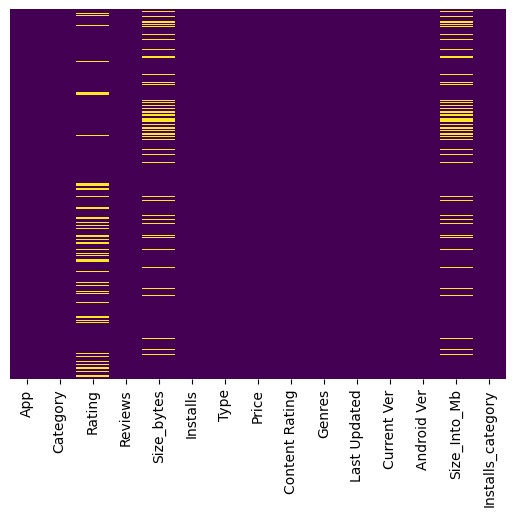

In [887]:
# plot the missing values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Missing Values Percentage in each Column')

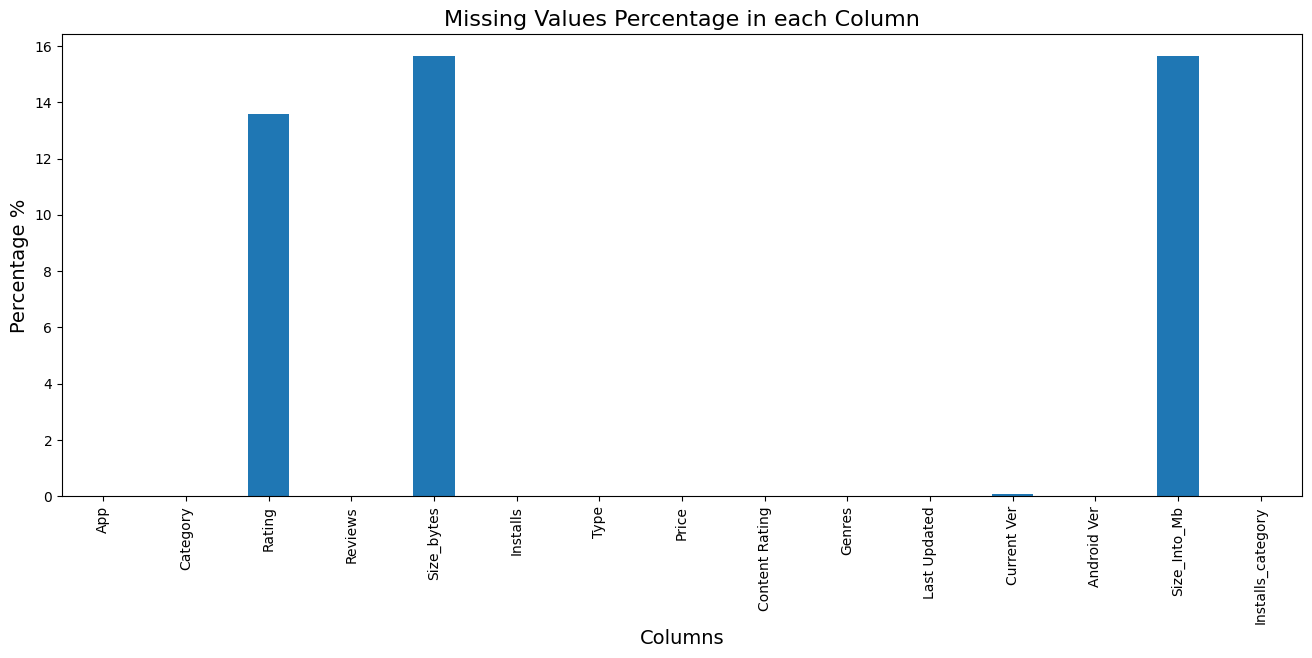

In [888]:
# make a figure size
plt.figure(figsize=(16,6))
# plot the null values by their prcentage in each column
missing_percentage = df.isnull().sum()/len(df) * 100
missing_percentage.plot(kind='bar')
 # add labels and title
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Percentage %", fontsize=14)
plt.title("Missing Values Percentage in each Column", fontsize=16)




- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

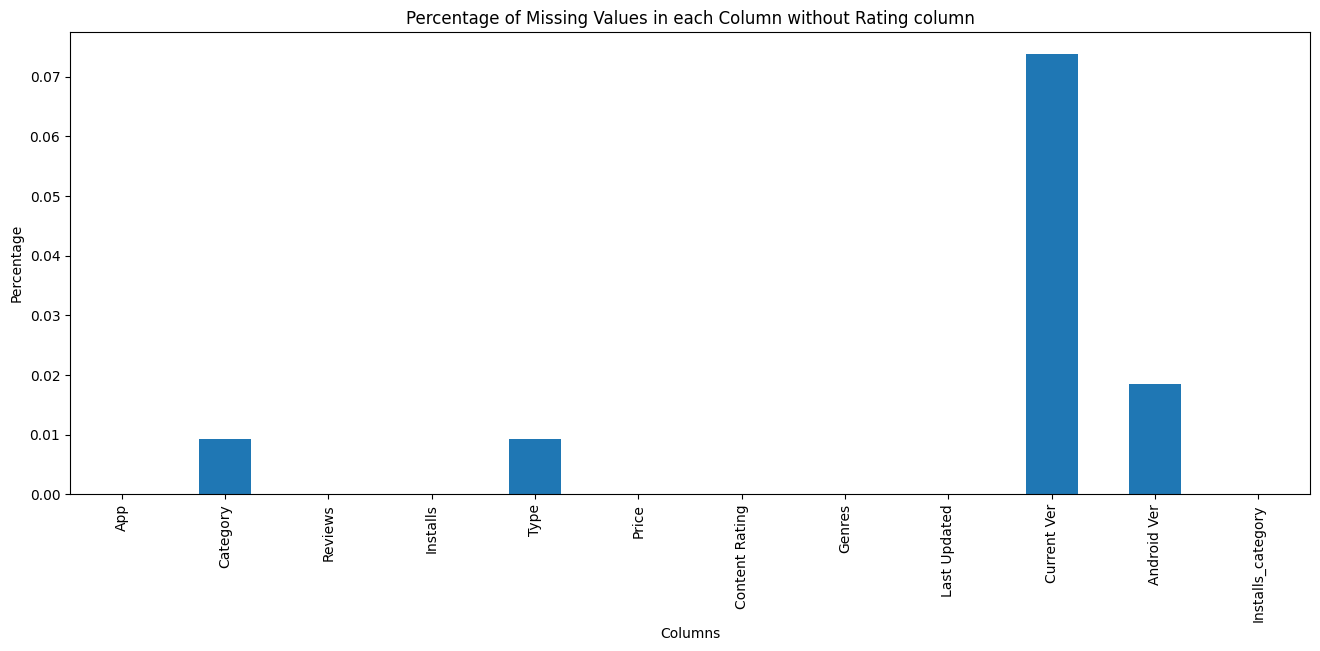

In [889]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

In [890]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order


Size_bytes           1695
Size_Into_Mb         1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Installs                0
Reviews                 0
App                     0
Price                   0
Last Updated            0
Genres                  0
Content Rating          0
Installs_category       0
dtype: int64

In [891]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column


Size_bytes           15.635089
Size_Into_Mb         15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Category              0.009224
Installs              0.000000
Reviews               0.000000
App                   0.000000
Price                 0.000000
Last Updated          0.000000
Genres                0.000000
Content Rating        0.000000
Installs_category     0.000000
dtype: float64

# Observation

- We have 1695 missing values in the 'Size_in_bytes' and 'Size_in_Mb' columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the 'Rating' column, which is 13.6% of the total values in the column.
- We have 8 missing value in the 'Current Ver' column, which is 0.07% of the total values in the column.
- We have 2 missing values in the 'Android Ver' column, which is 0.01% of the total values in the column.
- We have only 1 missing value in Category, Type and Genres columns, which is 0.009% of the total values in the column.

# 2.3. Dealing with the missing values
- We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

- Let's run the correlations


In [892]:
df.describe() # these are numeric columns



,Rating,Reviews,Size_bytes,Installs,Price,Size_Into_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

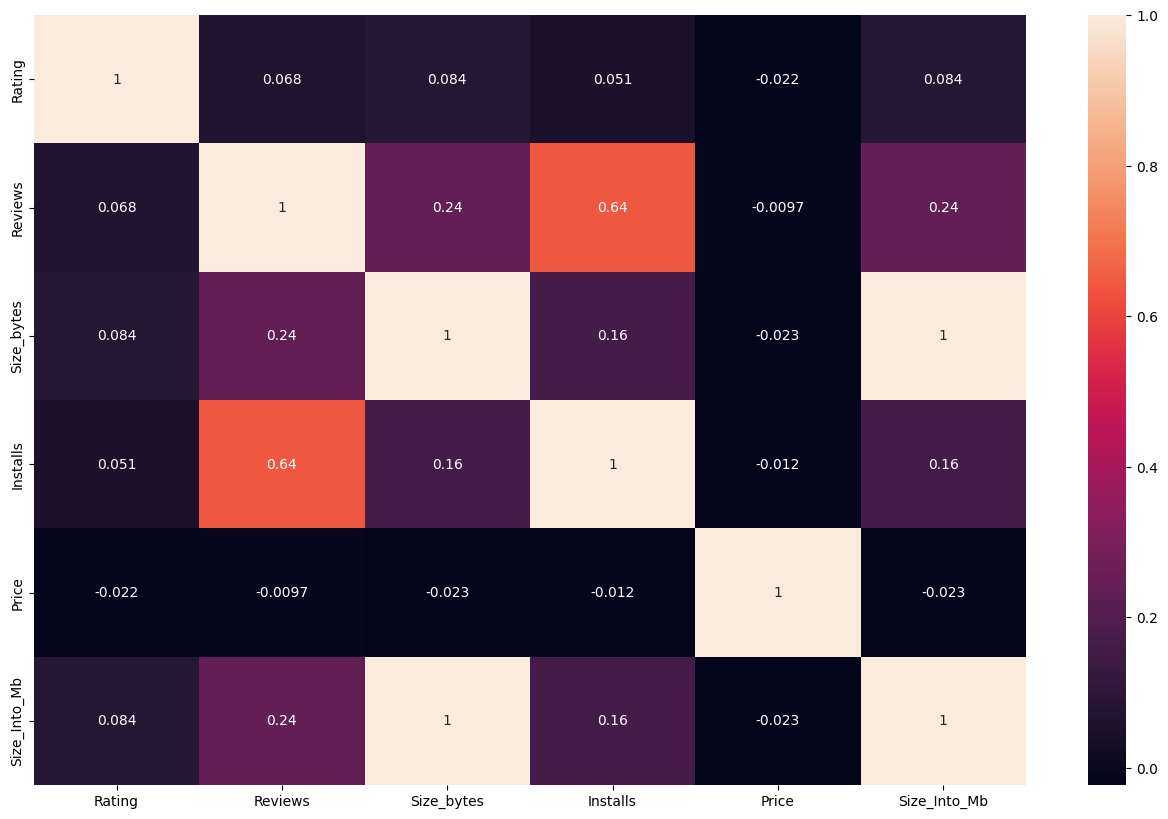

In [893]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_bytes', 'Installs', 'Price', 'Size_Into_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot the correlation matrix

In [894]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_bytes,Installs,Price,Size_Into_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_Into_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [ ]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# Ensure 'Reviews' and 'Installs' are numeric
df_clean = df.dropna().copy()
df_clean['Reviews'] = pd.to_numeric(df_clean['Reviews'], errors='coerce')
df_clean['Installs'] = pd.to_numeric(df_clean['Installs'], errors='coerce')

# Remove any rows with NaN after conversion
df_clean = df_clean.dropna(subset=['Reviews', 'Installs'])

# calculate Pearson's R between Reviews and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

ModuleNotFoundError: No module named 'scipy'